<a href="https://colab.research.google.com/github/vtu14918/machine-learning-projects/blob/main/MINOR_PROJECT_VERZEO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CLASSICATION OF IRIS DATASET***

---



---



Every machine learning project begins by understanding what the data and drawing the objectives. While applying machine learning algorithms to your data set, you are understanding, building and analyzing the data as to get the end result.

Following are the steps involved in creating a well-defined ML project:

1] Understand and define the problem

2] Prepare the data

3] Explore and Analyse the data

4] Apply the algorithms

5] Reduce the errors

6] Predict the result

To understand various machine learning algorithms let us use the Iris data set, one of the most famous datasets available.

In [ ]:
import numpy as np # linear algebra
import pandas as pd


# **Understanding the Data**

Let us try to understand the basic desciption of the data in matahematical terms

In [ ]:
iris = pd.read_csv("f.csv") # the iris dataset is now a Pandas DataFrame

iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# **Analysing the data visually**

At the outset , let us look at a simple scatter plot , to get a visual feel of the data. 

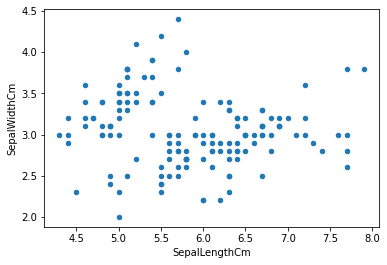

In [ ]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

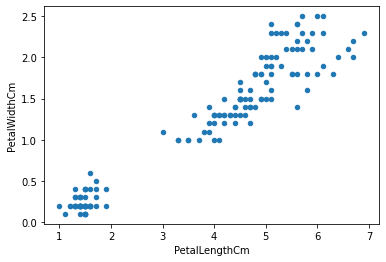

In [ ]:
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

let us see at the **box plot** of the dataset, which shows us the visual representation of how our data is scattered over the the plane. Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f573cf22f50>,
      dtype=object)

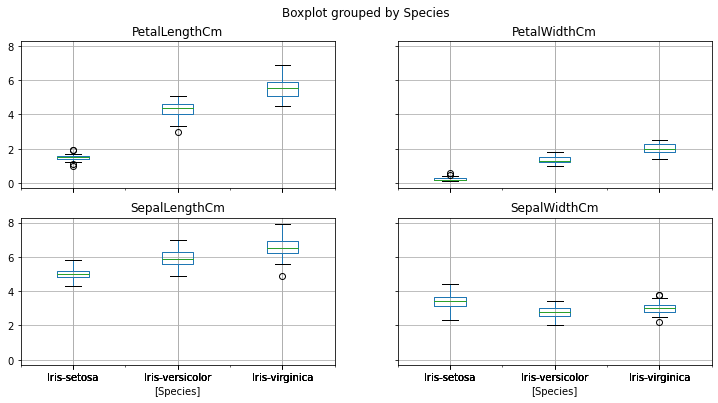

In [ ]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.



---



---



---



And now , let's see some special visuals !! One cool more sophisticated technique pandas has available is called ***Andrews Curves***

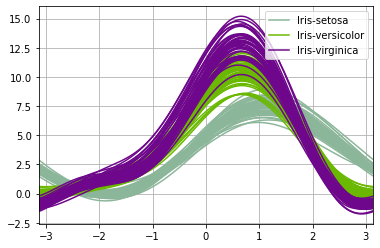

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

 Another multivariate visualization technique pandas has is **parallel_coordinates**
 Parallel coordinates plots each feature on a separate column & then draws lines
connecting the features for each data sample

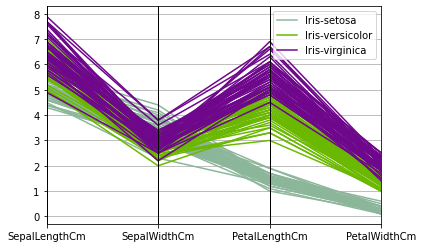

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

# **LETS ENTER INTO REAL MACHINE LEARNING CLASSIFICATION ALGORITHMS**

## **Dividing the data for training and testing**

once we under stood what data set needs the out come we can start train the model with common algorithms.

using an inbuilt library called ‘**train_test_split**’ which divides our data set into a ratio of 60:40. 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values


In [ ]:
X

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 9)

# **Training the model**

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing two algorithms to compare from the list below:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4]**Decision Trees**

5]**Naive Bayes classifier**

Let us start building our model and predicting accuracy of  **Decision Trees  and Navie Bayes Classifier algorithms** used. We can also check which gives the best result.

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

[[22  0  0]
 [ 0 20  0]
 [ 0  1 17]]
accuracy is 0.9833333333333333


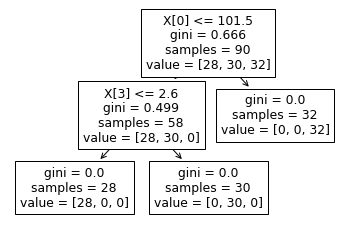

In [ ]:

# Decision Tree's
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

from sklearn import datasets

from sklearn import tree

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
tree.plot_tree(classifier)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

 **The Naive Bayes classifier. (Variants included)**

***Gaussian Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
cl= GaussianNB()
cl.fit(X_train, y_train)

y_pred = cl.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

[[22  0  0]
 [ 0 20  0]
 [ 0  0 18]]
accuracy is 1.0


***Multinomial Naive Bayes***

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.93        22
Iris-versicolor       0.74      0.70      0.72        20
 Iris-virginica       0.73      0.89      0.80        18

       accuracy                           0.82        60
      macro avg       0.82      0.82      0.81        60
   weighted avg       0.83      0.82      0.82        60

[[19  3  0]
 [ 0 14  6]
 [ 0  2 16]]
accuracy is 0.8166666666666667


***Bernoulli Naive Bayes***

In [ ]:

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        22
Iris-versicolor       0.00      0.00      0.00        20
 Iris-virginica       0.30      1.00      0.46        18

       accuracy                           0.30        60
      macro avg       0.10      0.33      0.15        60
   weighted avg       0.09      0.30      0.14        60

[[ 0  0 22]
 [ 0  0 20]
 [ 0  0 18]]
accuracy is 0.3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Complement Naive Bayes***

In [ ]:

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.85      1.00      0.92        22
Iris-versicolor       0.00      0.00      0.00        20
 Iris-virginica       0.53      1.00      0.69        18

       accuracy                           0.67        60
      macro avg       0.46      0.67      0.54        60
   weighted avg       0.47      0.67      0.54        60

[[22  0  0]
 [ 4  0 16]
 [ 0  0 18]]
accuracy is 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***COMPARISION OF ALOGORITHMS USED***





In [ ]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [DecisionTreeClassifier(),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=cols)
 
for i in classifiers:
    i.fit(X_train, y_train)
    name = i.__class__.__name__
    
    print("="*30)
    print(name)
    
    
    train_predictions = i.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.1%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc, 11]], columns=cols)
    log = log.append(log_entry)
    
    print("="*30)

DecisionTreeClassifier
Accuracy: 98.3%
GaussianNB
Accuracy: 100.0%
MultinomialNB
Accuracy: 81.7%
BernoulliNB
Accuracy: 30.0%
ComplementNB
Accuracy: 66.7%
